In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import folium
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/nyc_wifi_hotspots.csv')
print(dataset.head())

   OBJECTID Borough  ... DOITT_ID                         Location (Lat, Long)
0       998      MN  ...     1425  New York\n(40.74596800000, -73.99403900000)
1       999      MN  ...     1426  New York\n(40.74461400000, -73.98506900000)
2      1000      MN  ...     1427  New York\n(40.75766600000, -73.98587800000)
3      1001      MN  ...     1428  New York\n(40.75997100000, -73.98434200000)
4      1002      MN  ...     1429  New York\n(40.76041300000, -73.98454100000)

[5 rows x 29 columns]


In [4]:
print(dataset.columns)

Index(['OBJECTID', 'Borough', 'Type', 'Provider', 'Name', 'Location',
       'Latitude', 'Longitude', 'X', 'Y', 'Location_T', 'Remarks', 'City',
       'SSID', 'SourceID', 'Activated', 'BoroCode', 'BoroName', 'NTACode',
       'NTAName', 'CounDist', 'Postcode', 'BoroCD', 'CT2010', 'BCTCB2010',
       'BIN', 'BBL', 'DOITT_ID', 'Location (Lat, Long)'],
      dtype='object')


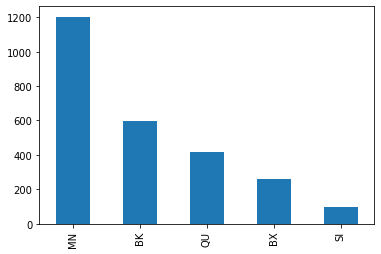

In [5]:
dataset['Borough'].value_counts().plot(kind='bar')

In [6]:
map = folium.Map(location=[40.75, -74])

for i in range(len(dataset)):
  folium.CircleMarker([dataset["Latitude"][i], dataset["Longitude"][i]], radius=5, color='red', fill_color='red').add_to(map)

In [7]:
display(map)

In [7]:
clustering = sklearn.cluster.KMeans(n_clusters = 8, init = 'k-means++')
clusters = clustering.fit(dataset[['Latitude','Longitude']].values)
labels = clusters.labels_

In [8]:
colors = ['#d53e4f','#f46d43','#fdae61','#fee08b','#e6f598','#abdda4','#66c2a5','#3288bd']
new_map = folium.Map(location=[40.75, -74])

for (latitude, longitude, label) in zip(dataset['Latitude'], dataset['Longitude'], labels):
    folium.CircleMarker([latitude, longitude], radius=5, color=colors[label], fill_color=colors[label]).add_to(new_map)

display(new_map)

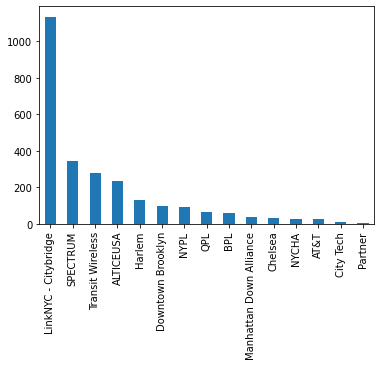

In [9]:
dataset['Provider'].value_counts().plot(kind='bar')

In [11]:
selection = dataset[dataset['Provider']=='LinkNYC - Citybridge']
kmeans = KMeans(n_clusters=5, init='k-means++').fit(selection[['Latitude', 'Longitude']].values)
labels = kmeans.labels_

colors = ['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba']
new_map_provider = folium.Map(location=[40.75, -74])

for (latitude, longitude, label) in zip(selection['Latitude'], selection['Longitude'], labels):
    folium.CircleMarker([latitude, longitude], radius=5, color=colors[label], fill_color=colors[label]).add_to(new_map_provider)

display(new_map_provider)    